# **CART Algorithm**
## - Collectez et préparez vos données
## - Sélectionnez les critères de fractionnement

# **Gini Impurity**

## **$Gini\ impurity = 1 - \sum\limits_{i=1}^n p(i)^2$**  (Pour une feuille)


## **$Total\ Gini = \frac{n_{left}}{n_{left} + n_{right}} Gini\ impurity\ _{left} + \frac{n_{right}}{n_{left} + n_{right}} Gini\ impurity\ _{right}$** (pour un noeud)


# **1 - Pour chaque colonne et chaque caractéristique qu'elle contient, calculer l'impureté Gini et trouvez la meilleure répartition :**

## pour chaque caractéristique de l'ensemble de données, parcourez ses valeurs possibles et sélectionnez la meilleure répartition qui minimise l'impureté ou maximise le gain d'informations. Vous pouvez utiliser l'impureté de chaque division potentielle pour sélectionner la meilleure division pour chaque caractéristique.

# **2 - Diviser les données et exécuter les critères d'arrêt pour chaque nœud :**

## -les nœuds sont-ils purs c'est-à-dire est-ce que gini = 0 ?

## -Profondeur maximale : définissez une profondeur maximale pour l'arbre, au-delà de laquelle aucune autre division ne peut être effectuée.

## -Échantillons minimum par nœud feuille : définissez un nombre minimum d'échantillons requis pour un nœud feuille, au-delà duquel aucune autre division ne peut être effectuée.

# **3 - répéter :**
## Nous continuons ce processus jusqu'à ce qu'un critère d'arrêt soit satisfait.

In [ ]:
#install packages
#!pip install graphviz

In [1]:
import numpy as np
import pandas as pd
from graphviz import Source , Digraph ,Graph
import random
from PIL import Image
from IPython.display import display

# **DATA**  
## **(The data should be prepared such that all categorical variables are stored as objects, and all continuous variables are stored as floats. Additionally, the target variable should be placed in the last column of the dataset. These are the only requirements for the data format.)**

In [2]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data")
df.columns = ["buying","maint","doors","persons","lug_boot","safety","eval"]
df

,buying,maint,doors,persons,lug_boot,safety,eval
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


# **NODE CLASS**

In [3]:
class Node():
  def __init__(self,gini=None ,finalclass=None,right=None,left=None,feature=None):
    self.gini = gini
    self.feature = feature
    self.finalclass = finalclass
    self.right = right
    self.left = left

# **CART ALGO CLASS WITH ALL THE FUNCTIONS**

In [4]:
class CART():
  ptype = None

  def __init__(self, ptype):
        self.ptype = ptype
        CART.ptype = ptype

  def train_test_split(self,df, proportion): 
    proportion = round(proportion * len(df))
    indices = df.index.tolist()
    test_indices = random.sample(population=indices, k=proportion)
    test_df = df.loc[test_indices]
    train_df = df.drop(test_indices)
    test_df = test_df.reset_index(drop=True)
    train_df = train_df.reset_index(drop=True)
    return train_df, test_df

  def changetonumpy(self,train_df):
    data = train_df.values
    return data

  def check_purity(self,data):
    label_column = data[:, -1]
    unique_classes = np.unique(label_column)
    if len(unique_classes) == 1:
        return True
    else:
        return False

  def classify_data(self,data):
    if CART.ptype == "classification":
        label_column = data[:, -1]
        unique_classes, count = np.unique(label_column, return_counts=True)
        index = count.argmax()
        classification = unique_classes[index]
        return classification
    elif CART.ptype == "regression":
        label_column = data[:, -1]
        classification=np.mean(label_column)
        return classification

  def all_splits(self,data):
    my_splits = {}
    for i in range(data.shape[1]-1):
      if str(df.dtypes[i]) == 'float64':
        l=[]
        for j in range(len(np.sort(data[:,i]))-1):
          l.append((np.sort(data[:,i])[j]+np.sort(data[:,i])[j+1])/2)
        my_splits[i]=l
      my_splits[i] = list(np.unique(data[:,i]))
    return my_splits

  def split_data(self,data, split_column , split_feature):
      if str(df.dtypes[split_column]) == 'float64':
            split_column_values = data[:, split_column]
            data_below = data[split_column_values < split_feature]
            data_above = data[split_column_values >=  split_feature]
      else:
        split_column_values = data[:, split_column]
        data_below = data[split_column_values == split_feature]
        data_above = data[split_column_values !=  split_feature]
      return data_below, data_above

  def gini(self,data,col,feature):
      if str(df.dtypes[col]) == 'float64':
        d1=data[data[:,col] < feature ]
        _,l1=np.unique(d1[:,-1],return_counts=True)
        gini_imp_leaf_1=1-np.sum(((l1)/np.sum(l1))**2)
        d2=data[data[:,col] >= feature ]
        _, l2 = np.unique(d2[:,-1],return_counts=True)
        gini_imp_leaf_2=1-np.sum(((l2)/np.sum(l2))**2)
        total_gini_impurity=(np.sum(l2)/(len(d2)+len(d1)))*gini_imp_leaf_2 + (np.sum(l1)/(len(d2)+len(d1)))*gini_imp_leaf_1
        return {"total_gini_impurity": total_gini_impurity}
      else:
        d1=data[data[:,col] == feature ]
        _,l1=np.unique(d1[:,-1],return_counts=True)
        gini_imp_leaf_1=1-np.sum(((l1)/np.sum(l1))**2)
        d2=data[data[:,col] != feature ]
        _, l2 = np.unique(d2[:,-1],return_counts=True)
        gini_imp_leaf_2=1-np.sum(((l2)/np.sum(l2))**2)
        total_gini_impurity=(np.sum(l2)/(len(d2)+len(d1)))*gini_imp_leaf_2 + (np.sum(l1)/(len(d2)+len(d1)))*gini_imp_leaf_1
        return {"total_gini_impurity": total_gini_impurity}

  def lowest_gini(self,data,my_splits):
        lowestnow = 10 
        for i in my_splits:
          for j in my_splits[i]:
                if self.gini(data,i,j)["total_gini_impurity"] < lowestnow:
                    lowestnow=self.gini(data,i,j)["total_gini_impurity"]
                    split_column=i
                    split_feature=j
                else:
                  continue
        return split_column , split_feature

  def RSS(self,data,col,feature):
        datab , dataa = self.split_data(data, col , feature)
        meandatab=self.classify_data(datab)
        meandataa=self.classify_data(dataa)
        RSS1 = np.sum((datab[:, -1]-meandatab)**2)
        RSS2 = np.sum((dataa[:, -1]-meandataa)**2)
        RSS = RSS1 + RSS2
        return RSS

  def lowest_RSS(self,data,my_splits):
        lowestnow = 10000000000000000000000
        for i in my_splits:
          for j in my_splits[i]:
                if self.RSS(data,i,j) < lowestnow:
                    lowestnow=self.RSS(data,i,j)
                    split_column=i
                    split_feature=j
                else:
                  continue
        return split_column , split_feature

  def decision_tree_algorithm(self,data, counter=0, min_samples=10, max_depth=3):
    if CART.ptype == "classification":
      if (self.check_purity(data)) or (len(data) < min_samples) or (counter == max_depth):
          classification = self.classify_data(data)
          split_column,split_feature = self.lowest_gini(data,self.all_splits(data))
          node=Node(finalclass=classification,gini='Gini impurity'+": "+str(self.gini(data,split_column,split_feature)["total_gini_impurity"]))
          return node
      else:    
          counter += 1
          split_column,split_feature = self.lowest_gini(data,self.all_splits(data))
          data_below, data_above = self.split_data(data, split_column,split_feature)
          if str(df.dtypes[split_column]) == 'float64':
            node=Node(gini='Gini impurity'+": "+str(self.gini(data,split_column,split_feature)["total_gini_impurity"]),feature=str(df.columns[split_column])+" < "+str(split_feature))
          else:
            node=Node(gini='Gini impurity'+": "+str(self.gini(data,split_column,split_feature)["total_gini_impurity"]),feature=str(df.columns[split_column])+" = "+str(split_feature))
          node.left = self.decision_tree_algorithm(data_below,counter,max_depth=max_depth)
          node.right = self.decision_tree_algorithm(data_above, counter,max_depth=max_depth)
          return node
    elif CART.ptype == "regression":
      if (self.check_purity(data)) or (len(data) < min_samples) or (counter == max_depth):
          classification = self.classify_data(data)
          split_column,split_feature = self.lowest_RSS(data,self.all_splits(data))
          node=Node(finalclass=classification,gini='RSS'+": "+str(self.RSS(data,split_column,split_feature)))
          return node
      else:    
          counter += 1
          split_column,split_feature = self.lowest_RSS(data,self.all_splits(data))
          data_below, data_above = self.split_data(data, split_column,split_feature)
          if str(df.dtypes[split_column]) == 'float64':
            node=Node(gini='RSS'+": "+str(self.RSS(data,split_column,split_feature)),feature=str(df.columns[split_column])+" < "+str(split_feature))
          else:
            node=Node(gini='RSS'+": "+str(self.RSS(data,split_column,split_feature)),feature=str(df.columns[split_column])+" = "+str(split_feature))
          node.left = self.decision_tree_algorithm(data_below, counter,max_depth=max_depth)
          node.right = self.decision_tree_algorithm(data_above, counter,max_depth=max_depth)
          return node

  def build_tree(self,df,max_depth=3):
    data = self.changetonumpy(df)
    tree=self.decision_tree_algorithm(data, counter=0, min_samples=2, max_depth=max_depth)
    return tree

  def build_graph(self, node, dot=None):          
    if CART.ptype=="classification":
      if dot is None:
          dot = Digraph()
      if node.feature is None:
            dot.node(str(id(node)), label="Class: "+str(node.finalclass)+"\n"+str(node.gini), 
                    style="filled", fillcolor="mistyrose", fontcolor="black")
      else:
          dot.node(str(id(node)), label=str(node.feature)+"\n"+str(node.gini), 
                  style="filled", fillcolor="white", fontcolor="black")
          dot = self.build_graph(node.left, dot=dot)
          dot = self.build_graph(node.right, dot=dot)
          dot.edge(str(id(node)), str(id(node.left)), label='True', 
                  fontcolor="black", color="black")
          dot.edge(str(id(node)), str(id(node.right)), label='False', 
                  fontcolor="black", color="black")     
      dot.graph_attr.update(bgcolor='white', fontcolor='white')
      dot.node_attr.update(fontname='Helvetica', fontsize='15', shape='box')
      dot.edge_attr.update(fontname='Helvetica', fontsize='12')
      return dot
    else:
      if dot is None:
          dot = Digraph()
      if node.feature is None:
            dot.node(str(id(node)), label="prediciton: "+str(node.finalclass)+"\n"+str(node.gini), 
                    style="filled", fillcolor="mistyrose", fontcolor="black")
      else:
          dot.node(str(id(node)), label=str(node.feature)+"\n"+str(node.gini), 
                  style="filled", fillcolor="white", fontcolor="black")
          dot = self.build_graph(node.left, dot=dot)
          dot = self.build_graph(node.right, dot=dot)
          dot.edge(str(id(node)), str(id(node.left)), label='True', 
                  fontcolor="black", color="black")
          dot.edge(str(id(node)), str(id(node.right)), label='False', 
                  fontcolor="black", color="black")
      dot.graph_attr.update(bgcolor='white', fontcolor='white')
      dot.node_attr.update(fontname='Helvetica', fontsize='15', shape='box')
      dot.edge_attr.update(fontname='Helvetica', fontsize='12')
      return dot

  def show_tree(self,tree):
    dot = self.build_graph(node=tree)
    return Source(dot.source)

  def classex(self,t, ex):
      if t.finalclass is not None:
          return t.finalclass
      else:
        L = t.feature.split(sep=" ")
        if str(df.dtypes[L[0]]) != 'float64':    
            if (ex[L[0]] == L[2]):
                return self.classex(t.left, ex)
            else:
                return self.classex(t.right, ex)
        else:
            if (float(ex[L[0]]) < float(L[2])):
                return self.classex(t.left, ex)
            else:
                return self.classex(t.right, ex)

  def predict(self,test_df,t):
    if cart.ptype=="classification":
      test_dfp=test_df.copy()
      correctpred = 0
      test_dfp["prediction"] = None
      for i in range(len(test_dfp)):
        test_dfp["prediction"][i] = self.classex(t, test_dfp.iloc[i])
        if (self.classex(t,test_dfp.iloc[i]) == test_dfp.values[i,-2]):
          correctpred = correctpred + 1
        else:
          continue
      acc = correctpred / len(test_dfp)
      return acc , test_dfp
    else:
      test_dfp=test_df.copy()
      test_dfp["prediction"] = None
      for i in range(len(test_dfp)):
        test_dfp["prediction"][i]=self.classex(t,test_dfp.iloc[i])
      mean=np.mean((test_dfp.values)[:,-2])
      TSS=np.sum(     (  (test_dfp.values)[:,-2]-mean   )      **2   )
      RSS = np.sum(   (    (test_dfp.values)[:,-2] - (test_dfp.values)[:,-1]    )**2   )
      print(RSS)
      print(TSS)
      Rsqrd=1-(RSS/TSS)
      return Rsqrd,test_dfp


## **Adaboost** est une méthode de classification qui utilise de nombreux faibles apprenants "Weak learners" pour faire des prédictions. Typiquement, ces apprenants faibles sont des arbres de décision avec une profondeur égal à un.
## certains apprenants faibles ont plus de poids dans le processus de classification que d'autres.
## Chaque arbre est construit en considérant les erreurs commises par l'arbre précédent.
# **Adaboost algorithm**

## 1- Nous attribuons des poids égaux à toutes les observations, puis nous identifions la répartition optimale comme nous l'avons fait dans l'algorithme CART, l'arbre aura généralement une profondeur d'un.

## 2-Nous déterminons ensuite l'influence que l'arbre aura dans la classification en utilisant la formule:

### $$ influence \ of \ tree = \frac{1}{2} \ln \left( \frac{1 - \text{error rate}}{\text{error rate}} \right) $$

### $$ error\ rate = \frac{\sum_{i=1}^N w_i \cdot I(y_i \neq \hat{y}_i)}{\sum_{i=1}^N w_i} $$


## 3- Nous modifions les poids des observations dans la dataframe d'origine pour tenir compte des erreurs commises par l'arbre précédent.

### $$w_i^{(t+1)} = w_i^{(t)} \cdot \exp(influence_t  h_t(\mathbf{x}_i))
$$



## 4- Après avoir ajusté les poids, nous échantillonnons les observations en fonction de ces poids et créons une nouvelle base de données de la même taille que l'original, et on crée un nouvel arbre de profondeur un avec cette base.

## 5- répétez les étapes 2 à 4 jusqu'à ce qu'un critère d'arrêt soit atteint.
(dans ce cas le critère d'arrêt est le nombre d'arbres)

# **ADA BOOST ALGO CLASS WITH ALL FUNCTIONS**

In [5]:
class Adaboost():

  def total_errors(self,test_df,t):
    if cart.ptype=="classification":
      test_dfp=test_df.copy()
      worngind= []
      correctind = []
      for i in range(len(test_dfp)):
        if (cart.classex(t,test_dfp.iloc[i]) == test_dfp.values[i,-1]):
          correctind.append(i)
        else:
          worngind.append(i)
      return worngind ,correctind



  def build_trees(self,df,trees=10,depth=1):
    if cart.ptype=="classification":
        nodelist = []
        say = []
        data = df.values
        for i in range(trees):
          col_length = len(data)
          if col_length == 0:
            break
          weights = np.full(col_length, 1/col_length)
          weight = weights[0]
          nodd = cart.decision_tree_algorithm(data, counter=0, min_samples=2, max_depth=depth)
          nodelist.append(nodd)
          data = df.values
          worngind ,correctind = self.total_errors(df,nodd)
          totalerror = np.sum(weights[worngind])
          power = 0.5 * ( np.log(  (  (1-totalerror)  /  (totalerror)  )  )  )
          say.append(power)
          weightr = weight * np.exp(-power)
          weightw = weight * np.exp(power)
          weights[worngind] = weightw
          weights[correctind] = weightr
          s=np.sum(weights)
          weights = weights/s
          sample_idx = np.random.choice(data.shape[0], size=len(data), p=weights)
          data = data[sample_idx]
        return [nodelist , say]   



  def classify(self,trees,ex):
    say = trees[1]
    trees =trees[0]
    predictions = []
    for t in trees:
      predictions.append(cart.classex(t,ex))
    vote_counts = {}
    for i in range(len(predictions)):
        pred = predictions[i]
        power = say[i]
        if pred not in vote_counts:
            vote_counts[pred] = 0
        vote_counts[pred] += power
        max_count = max(vote_counts.values())
    for pred, count in vote_counts.items():
        if count == max_count:
            return pred

  def predict(self,test_df,trees):
    if cart.ptype=="classification":
      test_dfp=test_df.copy()
      correctpred = 0
      test_dfp["prediction"] = None
      for i in range(len(test_dfp)):
        test_dfp["prediction"][i] = self.classify(trees, test_dfp.iloc[i])
        if (self.classify(trees,test_dfp.iloc[i]) == test_dfp.values[i,-2]):
          correctpred = correctpred + 1
        else:
          continue
      acc = correctpred / len(test_dfp)
      return acc , test_dfp
    else:
      test_dfp=test_df.copy()
      test_dfp["prediction"] = 0
      for i in range(len(test_dfp)):
        test_dfp["prediction"][i]=self.classify(trees,test_dfp.iloc[i])
      mean=np.mean((test_dfp.values)[:,-2])
      TSS=np.sum(((test_dfp.values)[:,-2]-mean)**2)
      RSS = np.sum(((test_dfp.values)[:,-2] - (test_dfp.values)[:,-2])**2)
      Rsqrd=1-(RSS/TSS)
      return Rsqrd,test_dfp


  def show_trees(self,nodelist):
    nodelist = nodelist[0]
    images = []
    i =0
    for node in nodelist:
        node = cart.build_graph(node, dot=None)
        node.render("img"+str(i), format='png')
        image = Image.open("img"+str(i)+'.png')
        images.append(image)
        i = i + 1
    widths, heights = zip(*(i.size for i in images))
    max_width = max(widths)
    total_height = sum(heights)
    new_im = Image.new('RGB', (max_width, total_height), color=(255, 255, 255))
    y_offset = 0
    for im in images:
        new_im.paste(im, (0, y_offset))
        y_offset += im.size[1]
    display(new_im)

# **FITTING THE DATA (Decision TREE)**

In [6]:
random.seed(2)
cart = CART("classification")
train , test = cart.train_test_split(df,proportion=0.3)
tree = cart.build_tree(train,max_depth=3)
acc , pred = cart.predict(test,tree)

In [7]:
#accuracy
print("the accuracy is",acc)

the accuracy is 0.7895752895752896


In [8]:
#data frame with the predictions
pred

,buying,maint,doors,persons,lug_boot,safety,eval,prediction
0,vhigh,high,2,2,big,high,unacc,unacc
1,vhigh,high,4,more,big,high,unacc,unacc
2,vhigh,high,4,4,med,low,unacc,unacc
3,high,med,5more,4,small,high,acc,acc
4,low,low,5more,4,small,high,good,acc
...,...,...,...,...,...,...,...,...
513,med,vhigh,5more,4,med,med,acc,acc
514,low,med,3,more,small,med,acc,acc
515,low,high,2,more,small,low,unacc,unacc
516,vhigh,vhigh,4,4,big,med,unacc,unacc


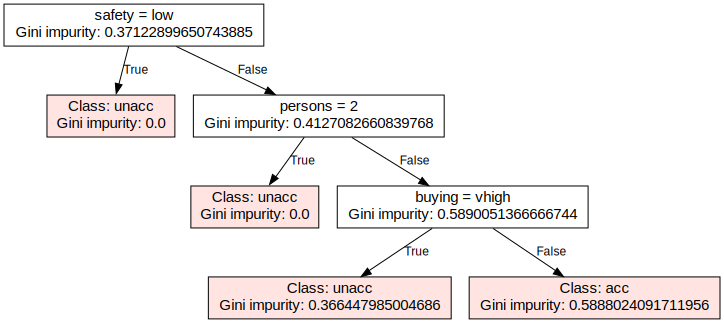

In [9]:
# plotting the tree 
cart.show_tree(tree)

# **The results using sickit learn are identical**
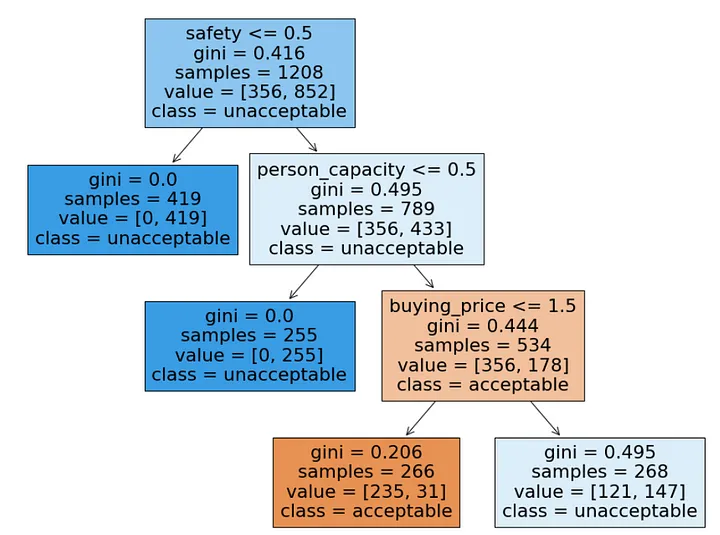

# **FITTING THE DATA (Adaboost)** 5 trees 1 depth

In [10]:
random.seed(42)
cart = CART("classification")
ada= Adaboost()
train , test = cart.train_test_split(df,proportion=0.2)
trees= ada.build_trees(train,trees=5,depth = 1)
acc , pred = ada.predict(test,trees)

In [11]:
#accuracy
print("the accuracy is",acc)

the accuracy is 0.7072463768115942


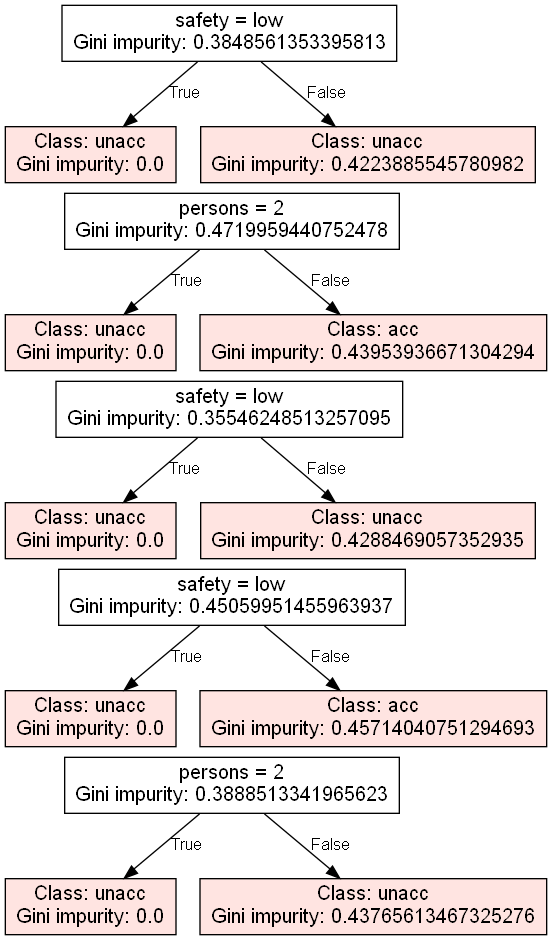

In [12]:
# plotting the tree 
ada.show_trees(trees)

In [ ]:
#data frame with the predictions
pred